# Classification Project

## Overview

You will be analyzing a movie data. Your goals in this project are 
+ to build classifiers that predict the genre of a movie--action or romance--based on the frequencies in which certain words appear in the movie script and
+ to analyze the performance of these classifiers.

Project components:
1. **Data exploration and feature selection**

    In order to get a sense of what features can help us distinguish an action movie from a romance movie, you would have to do some initial exploration and visualization of your training dataset.  Your project should include at least three data visualizations that help justify how you design your classifier.<br><br>
    
2. **Development of your own classifier**
    
    Your task here is to build your own "simple classifier"; it should use at least three features and you should use at least two if-else statements.  This classifier should be informed by your initial data exploration (step 1 above).<br><br>
    
3. **Assessment of your classifier**

    Assess how your classifier does in predicting the genres of the movies in your test dataset.  You should measure the accuracy of your classifier.  Then, you should use one other metric (this could be one of the metrics we have discussed in class or one that you construct yourself).  If you use a metric that you created yourself, please include a brief explanation of your idea.<br><br>
    
4. **Comparison of the performance of your classifier to that of a k-Nearest Neighbor Classifier**

    Use a kNN classifier with a particular choice of $k$ to predict the genre of the movies in your test dataset and assess the quality of the predictions.  Explain your choice of $k$.  Compare the performance of your classifier to that of the kNN classifier; comment on the result.<br><br>
    
5. **Writeup (Summary and Conclusion)**

    Your writeup should include

    + An explanation of your data visualizations (why you picked the pairs of words to plot, etc.) and an interpretation of your data visualization
    + An explanation of your simple classifier, including how the data visualizations you produced inform the simple classifier(s) you constructed
    + A discussion on the metrics you use to assess the performance of the classifiers
    + A discussion of the performance of your simple classifier(s), in terms of accuracy and one other metric
    + A discussion of the performance of the kNN classifier, including what $k$ value you chose and why, in terms of accuracy and one other metric
    + A summary of how the simple classifier(s) you constructed compares to the kNN classifier, which classifier you would recommend to use, the shortcomings of your chosen classifiers, and any ideas for future improvements

## Team Information

Team members: (enter your names here)

NetIDs: 

## 0. Load data and libraries; split data into training and test data

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
moviesdata = pd.read_csv('../datasets/movies.csv')

In [3]:
# size of data
print(moviesdata.shape) # 242 rows, 5006 columns -> 242 movies, 5006 columns

(242, 5006)


In [4]:
# Decide how many rows will be used for training and testing (for example, 30% for test)

# two ways (depending on course objectives)
# 1. the short way, using sklearn
#from sklearn.model_selection import train_test_split
#training_data, test_data = train_test_split(moviesdata, test_size=0.3)


# 2. do it "from scratch"
# Split moviesdata into two
#   scramble rows of the movies data
moviesdata_scrambled = moviesdata.sample(frac=1, random_state = 1).reset_index(drop=True)

#   split
num_test = np.round( 0.3 * 242 )

training_rows_indices = np.arange(num_test, 242)
test_rows_indices = np.arange(0, num_test)

training_data = moviesdata_scrambled.iloc[training_rows_indices, : ]
test_data = moviesdata_scrambled.iloc[test_rows_indices, : ]

In [5]:
# check numberof training and test data
print(training_data.shape)
print(test_data.shape)

(169, 5006)
(73, 5006)


## 1. Data exploration and feature selection

In [6]:
# peek into the dataset
training_data.head(4)

,Title,Genre,Year,Rating,# Votes,# Words,i,the,to,a,...,foster,pub,vegetarian,garrison,grammoo,chimney,bikini,richter,psychopath,fling
73,terminator 2: judgment day,action,1991,8.5,243230,2144,0.037313,0.030784,0.032649,0.026586,...,0.000466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,little nicky,romance,2000,5.0,35489,2897,0.042803,0.031757,0.026234,0.019676,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75,15 minutes,action,2001,6.1,25854,5990,0.036895,0.030217,0.027713,0.028214,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,the boondock saints,action,1999,7.8,87895,4799,0.023963,0.042926,0.016045,0.021671,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cols = training_data.columns

print(cols)
# column 1 = Title
# column 2 = Genre <- LABEL
# column 3 = Year
# column 4 = Rating
# column 5 = X..Votes
# column 6 = X..Words
# columns 7 onwards = words <- VARIABLES

Index(['Title', 'Genre', 'Year', 'Rating', '# Votes', '# Words', 'i', 'the',
       'to', 'a',
       ...
       'foster', 'pub', 'vegetarian', 'garrison', 'grammoo', 'chimney',
       'bikini', 'richter', 'psychopath', 'fling'],
      dtype='object', length=5006)


In [8]:
# finding the column index of a word (and to check if a word is there or not)
training_data.columns.get_loc('love')

112

(0, 0.001)

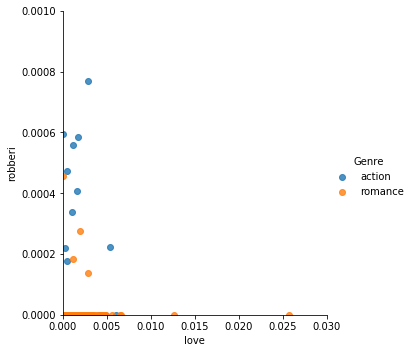

In [9]:
# scatter plot: the frequency of 'love' on x-axis, 'robberi' on y-axis, color of points corresponds to genre

sns.lmplot(x = 'love', y = 'robberi', hue = 'Genre', data = training_data, fit_reg=False )
plt.xlim(0, 0.03 )
plt.ylim(0, 0.001)

# Observation: if love > 0.005, likely to be romance; if roberri > 0.0003, likely to be action

(0, 0.001)

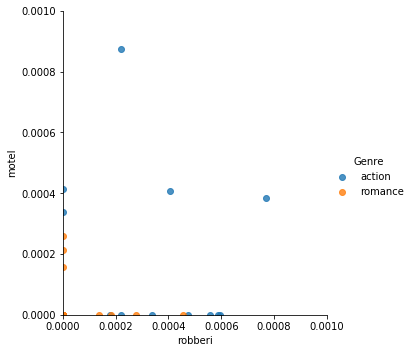

In [10]:
# scatter plot 2

sns.lmplot(x = 'robberi', y = 'motel', hue = 'Genre', data = training_data, fit_reg=False )

plt.xlim(0, 0.001 )
plt.ylim(0, 0.001 )

(0, 0.001)

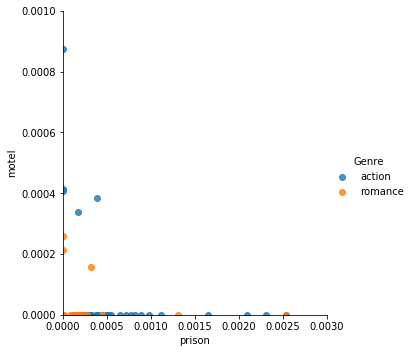

In [11]:
# scatter plot 3

sns.lmplot(x = 'prison', y = 'motel', hue = 'Genre', data = training_data, fit_reg=False )

plt.xlim(0, 0.003 )
plt.ylim(0, 0.001 )

## 2. Development of your own classifier

In [12]:
def my_classifier( love_freq, robberi_freq, motel_freq, prison_freq ):
    if (love_freq > 0.005):
        output = 'romance'
    elif (robberi_freq > 0.0003):
        output = 'action'
    elif (motel_freq > 0.0003):
        output = 'action'
    elif (prison_freq > 0.00025):
        output = 'action'
    else:
        output = 'romance'
    
    return output

In [13]:
# test
my_classifier( 0.0001, 0.001, 0.0002, 0.005)

'action'

In [14]:
# test with a row from training data

#  pick the movie
row_index = 1 # pick a row number 
movie_title = training_data.iloc[ row_index, 0]
actual_genre = training_data.iloc[ row_index, 1]

#  get columns indices of the chosen words/"features"
love_col = training_data.columns.get_loc('love')
robberi_col = training_data.columns.get_loc('robberi')
motel_col = training_data.columns.get_loc('motel')
prison_col = training_data.columns.get_loc('prison')

feature_columns = [robberi_col, love_col, motel_col, prison_col]

# check column indices
print( feature_columns )

# check frequencies
print( training_data.iloc[row_index, feature_columns ] )

# check frequencies
love_freq = training_data.iloc[ row_index, love_col ]
robberi_freq = training_data.iloc[ row_index, robberi_col ]
motel_freq = training_data.iloc[ row_index, motel_col ]
prison_freq = training_data.iloc[ row_index, prison_col ]



# predict
predicted_genre = my_classifier( love_freq, robberi_freq, motel_freq, prison_freq )



print( 'Movie title: ' + movie_title) 
print( 'Actual genre: ' + actual_genre)
print( 'Predicted genre: ' + predicted_genre)

[2449, 112, 2255, 609]
robberi             0
love       0.00276148
motel               0
prison              0
Name: 74, dtype: object
Movie title: little nicky
Actual genre: romance
Predicted genre: romance


In [15]:
# write a "predict" function

def predict( dataset ):
    
    num_rows = dataset.shape[0]
    
    # column indices
    love_col = training_data.columns.get_loc('love')
    robberi_col = training_data.columns.get_loc('robberi')
    motel_col = training_data.columns.get_loc('motel')
    prison_col = training_data.columns.get_loc('prison')
    
    # set up a blank dataframe containing one column: predicted genre
    #   and num_training many rows
    output_df = pd.DataFrame( index = range(0,num_rows),columns=['PredictedGenre'], dtype='str')
    
    # loop over each row in the training dataset
    row_index = 0
    while( row_index < num_rows ):
        # frequencies
        love_freq = dataset.iloc[ row_index, love_col ]
        robberi_freq = dataset.iloc[ row_index, robberi_col ]
        motel_freq = dataset.iloc[ row_index, motel_col ]
        prison_freq = dataset.iloc[ row_index, prison_col ]
        
        # predicted genre
        pred = my_classifier( love_freq, robberi_freq, motel_freq, prison_freq )
        output_df.iloc[ row_index, 0 ] = pred
        
        row_index = row_index+ 1
    
    return output_df

In [16]:
# predict genres of movies in test data

prediction_df = predict( test_data ) 

prediction_df.head()

,PredictedGenre
0,action
1,romance
2,action
3,romance
4,romance


## 3. Assessment of your classifier

In [17]:
# write a function that computes the accuracy, given two lists

def compute_accuracy ( actual_genres, predicted_genres ):
    
    num_data = len(actual_genres)
    num_correct = np.sum( actual_genres == predicted_genres)
    accuracy = num_correct / num_data
    
    return accuracy 

In [18]:
prediction_accuracy = compute_accuracy( test_data['Genre'], prediction_df['PredictedGenre'] )

print( prediction_accuracy )

0.547945205479452


In [19]:
# write another function/metric that assesses the classifier

# for example:
# find the rate of correct predictions out of all romance movies
# (this is essentially the "true positive rate" if our question has been "is this a romance movie?")

def compute_true_romance_rate( actual_genres, predicted_genres ):
    num_rows = len(actual_genres)
    num_romance = np.sum( actual_genres == 'romance' )
    
    # loop to count the number of movies that are actually romance and was predicted to be romance
    # counters to be incremented in the loop:
    num_true_romance = 0
    row_index = 0
    
    while( row_index < num_rows ) :
        if ( (actual_genres[row_index] == predicted_genres[row_index]) and (actual_genres[row_index] == 'romance') ):
            num_true_romance = num_true_romance + 1
        row_index = row_index + 1
    
    true_romance_rate = num_true_romance / num_romance
    
    return true_romance_rate

In [20]:
prediction_true_romance_rate = compute_true_romance_rate( test_data['Genre'], prediction_df['PredictedGenre'] )

print( prediction_true_romance_rate )

0.9615384615384616


## 4. k-Nearest Neighbor Classifier

In [21]:
# we'll do this twice:
# 1. using the KNeighborsClassifier function from sklearn.neighbors
# 2. using our own knn function, possibly with tweaks
# and compare the results


# -----
# 1. Using KNeighborsClassifier from sklearn
# first load the library
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# for starters, try kNN with k = 5
feature_columns = [robberi_col, love_col, motel_col, prison_col]
label_column = 1

# use knn() from class library to predict the genres of movies in test_data 
knnmodel = KNeighborsClassifier( n_neighbors = 5 )

knnmodel.fit( X = training_data.iloc[ :, feature_columns] , y = training_data.iloc[:,label_column] )

knn_prediction = knnmodel.predict( test_data.iloc[:, feature_columns] )

# compute the accuracy
knn_prediction_accuracy = compute_accuracy( test_data.iloc[:,label_column], knn_prediction )
print(knn_prediction_accuracy )

# compute the "true romance rate"
knn_prediction_true_romance_rate = compute_true_romance_rate( test_data.iloc[:,label_column], knn_prediction )
print( knn_prediction_true_romance_rate )

0.726027397260274
0.6923076923076923


In [23]:
# -----
# 2. Writing our own knn function

# first write a function that computes the distance between two rows
def compute_distance( row1, row2 ):
    output = np.sqrt( np.sum( (row1 - row2) ** 2 ) )
    return output

# write a knn function that predicts the label of a new point (row) 
#  based on its distance to rows in the training data frame
def knn_one_point( training, new_point_row, label_column, feature_columns, k ):
    num_rows = training.shape[0]
    
    # compute the distance between the new data point and each row in the training data frame
    distances_df = pd.DataFrame( index = np.arange(0, num_rows), columns = ['Genre', 'Distance'], dtype = float )
    
    row_index = 0
    while (row_index < num_rows ):
        distances_df.iloc[ row_index, 0] = training.iloc[row_index, label_column]
        dist = compute_distance( training.iloc[row_index, feature_columns ], 
                                                          new_point_row[ feature_columns ] )
        distances_df.iloc[ row_index, 1 ] = dist
        row_index = row_index + 1
        
    # find the k closest neighbors and their labels
    k_nearest_neighbors = distances_df.nsmallest(k, 'Distance') # find rows with smallest k distances
    labels_of_k_nearest_neighbors = k_nearest_neighbors['Genre'] # keep the labels
    
    # predict label of new point
    
    #  ( here, some students might experiment with other ways to pick a label;
    #     for example by taking into account the distance from new point to each neighbor; closer neighbors might
    #     carry more "vote", etc. )
    
    num_romance = np.sum( labels_of_k_nearest_neighbors == 'romance')
    num_action = np.sum( labels_of_k_nearest_neighbors == 'action')
    
    # implement majority vote for choosing label of new point; toss an unbiased coin if there is a tie
    if( num_romance < num_action ):
        new_point_label = 'action'
    elif ( num_romance > num_action ):
        new_point_label = 'romance'
    else: # if there is a tie (possible when k is even)
        new_point_label = np.random.choice( ['romance', 'action'], 1 )
    
    return new_point_label


# write a knn function that predicts the label of each row in a test data frame 
#  based on their distances to rows in the training data frame

def my_knn( training, test, label_column, feature_columns, k ):
    num_test = test.shape[0]
    
    prediction_df = pd.DataFrame( index = np.arange(0, num_test), columns = ['PredictedGenre'], dtype = float )
    
    test_row_index = 0
    while( test_row_index < num_test):
        prediction_df.iloc[test_row_index, 0] = knn_one_point( training, 
                                                              test.iloc[test_row_index,:], 
                                                              label_column, feature_columns, k )
        test_row_index = test_row_index + 1
    
    return prediction_df

In [24]:
feature_columns = [robberi_col, love_col, motel_col, prison_col]
label_column = 1

# for starters, try with k = 5
k = 5
my_knn_prediction = my_knn( training_data, test_data, label_column, feature_columns, k)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


In [25]:
# check accuracy and true romance rate

my_knn_accuracy = compute_accuracy( test_data.iloc[:, label_column], my_knn_prediction.iloc[:,0] )
my_knn_true_romance_rate = compute_true_romance_rate( test_data.iloc[:,label_column], my_knn_prediction.iloc[:,0] )

print( my_knn_accuracy )
print( my_knn_true_romance_rate )

0.726027397260274
0.6923076923076923


In [26]:
np.sum(knn_prediction == my_knn_prediction.iloc[:,0])

# the knn() function and our m_knn() function gives us the same predictions for most of the movies, but not all
#  (this might be caused by ties: for some movies, it might have ties in closest neighbors with different labels)

73

## 5. Writeup (Summary and Conclusion)

(Your writeup goes here)